# Exploratory data analysis (EDA) of supermarket data

## Libraries and settings

In [4]:
# Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/data_analytics/Week_04_solution


# importing data


In [5]:
# Read the CSV file with pandas and select the desired columns
df = pd.read_csv("supermarkets_data_enriched.csv")[[
    'type',
    'id',
    'lat',
    'lon',
    'brand',
    'shop',
    'addr:city',
    'addr:housenumber',
    'addr:postcode',
    'geometry',
    'index_right',
    'bfs_name',
    'bfs_number',
    'pop',
    'pop_dens',
    'frg_pct',
    'emp'
]]
# Remove duplicates
df = df.drop_duplicates()
df.head(5)

# Remove missing values
df = df.dropna()
df.head(5)

,type,id,lat,lon,brand,shop,addr:city,addr:housenumber,addr:postcode,geometry,index_right,bfs_name,bfs_number,pop,pop_dens,frg_pct,emp
1,node,280130028,47.155492,9.039666,ALDI,supermarket,Schänis,3,8718.0,POINT (9.0396663 47.1554921),227,Schänis,3315,3876,97.142857,13.054696,1408.0
2,node,6122906632,47.158959,9.044477,Denner,supermarket,Schänis,14,8718.0,POINT (9.0444769 47.1589589),227,Schänis,3315,3876,97.142857,13.054696,1408.0
4,node,36726161,47.226191,8.980329,Migros,supermarket,Uznach,25,8730.0,POINT (8.9803292 47.2261912),1217,Uznach,3339,6489,860.610080,27.862537,3500.0
6,node,7389830915,47.225056,8.970650,Denner,supermarket,Uznach,15,8730.0,POINT (8.9706499 47.2250563),1217,Uznach,3339,6489,860.610080,27.862537,3500.0
7,node,39947904,47.376732,8.542161,Coop,supermarket,Zürich,1,8001.0,POINT (8.5421608 47.3767316),77,Zürich,261,420217,4778.994655,32.458468,491193.0


# Count number of supermarkets per brand

In [8]:
brandCount = df['brand'].value_counts()

print(brandCount)

brand
Migros                                   335
Coop                                     174
Denner                                   142
Volg                                      68
VOI Migros Partner                        43
ALDI                                      39
Lidl                                      25
Aldi                                      25
Spar                                      19
Landi                                     15
Migros-Outlet                             11
Alnatura                                  11
VOI                                        4
Globus                                     2
ZWIBOL                                     1
Lidl Schweiz                               1
Jumbo                                      1
Rolog Krinner Cotub Titan Serac Molok      1
Name: count, dtype: int64


# Barchart brand count

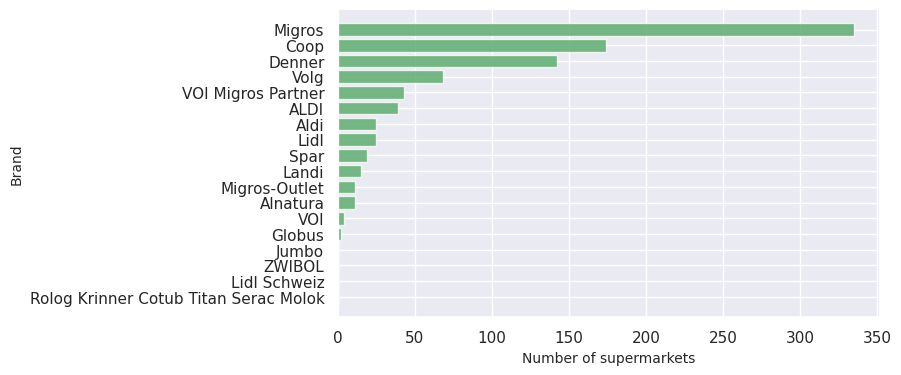

In [9]:
# Values for barchart
napart = list(df['brand'].value_counts().sort_values(ascending=True).values)
index = list(df['brand'].value_counts().sort_values(ascending=True).index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of supermarkets', fontsize=10)
ax.set_ylabel('Brand', fontsize=10)

# Show graph
plt.show()

# Scatterplot

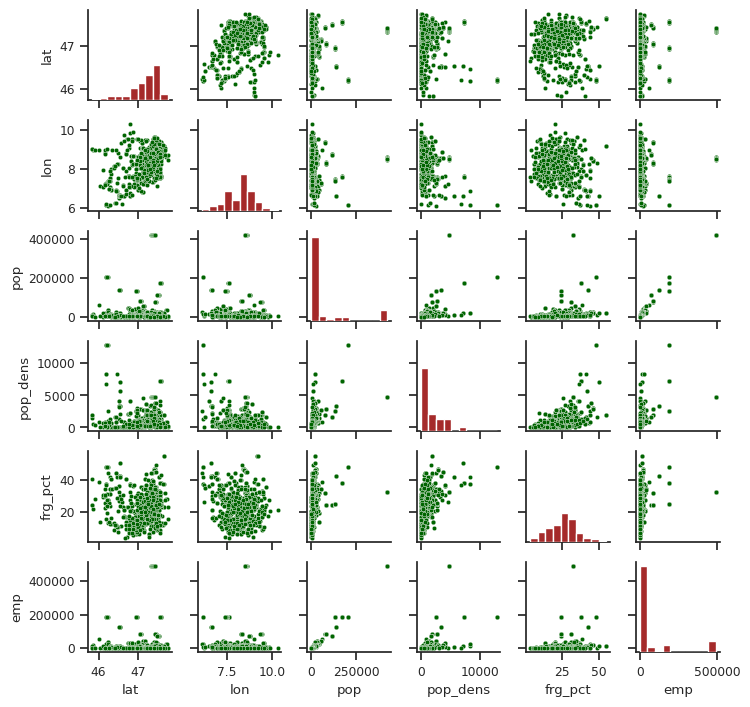

In [10]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df[['lat', 
                     'lon', 
                     'pop', 
                     'pop_dens',
                     'frg_pct',
                     'emp']], 
                 height=1.2, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')

# Map

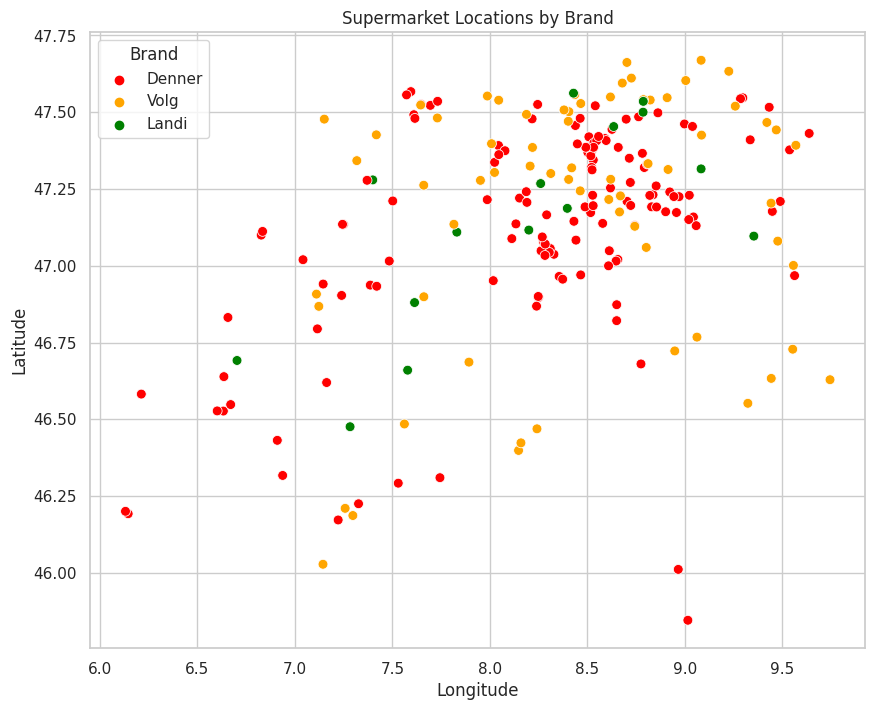

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting relevant columns for the plot
df_plot = df[df['brand'].isin(['Denner', 'Volg', 'Landi'])][['lat', 'lon', 'brand']]

# Define a custom color palette for each brand
brand_palette = {'Denner': 'red', 'Volg': 'orange', 'Landi': 'green'}

# Create a scatter plot with different colors for each brand
plt.figure(figsize=(10, 8))
sns.scatterplot(x='lon', y='lat', hue='brand', data=df_plot, palette=brand_palette, s=50)
plt.title('Supermarket Locations by Brand')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Brand')

# Show the plot
plt.show()
